In [206]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# Import Dataset
df_spend = pd.read_csv('https://raw.githubusercontent.com/erdyfrye/Clustering/master/Mall_Customers.csv')
df_spend

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [208]:
# Prints Descriptive Statistics
df_spend.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Kmeans

## Spending Score berdasarkan Annual Income

In [209]:
# Select Features
df_income=df_spend.drop(['Gender','CustomerID','Age'], axis=1)
# Prints the Dataset Information
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [210]:
# Prints Descriptive Statistics
df_income.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [211]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_income.columns.tolist()
df_income[column_names] = scaler.fit_transform(df_income[column_names])
df_income.sort_index(inplace=True)
df_income

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


Text(0.5, 1.0, 'Customer Segments')

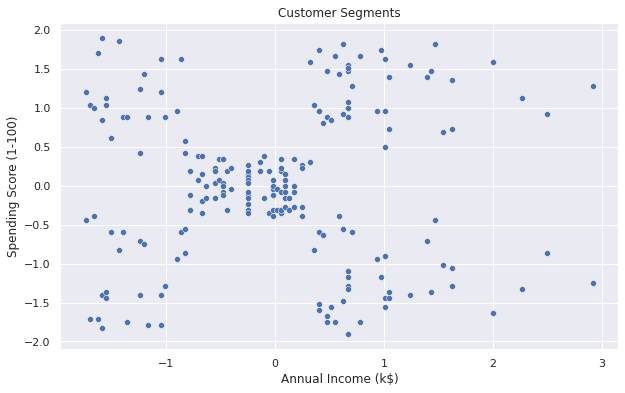

In [212]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_income)
plt.title('Customer Segments')

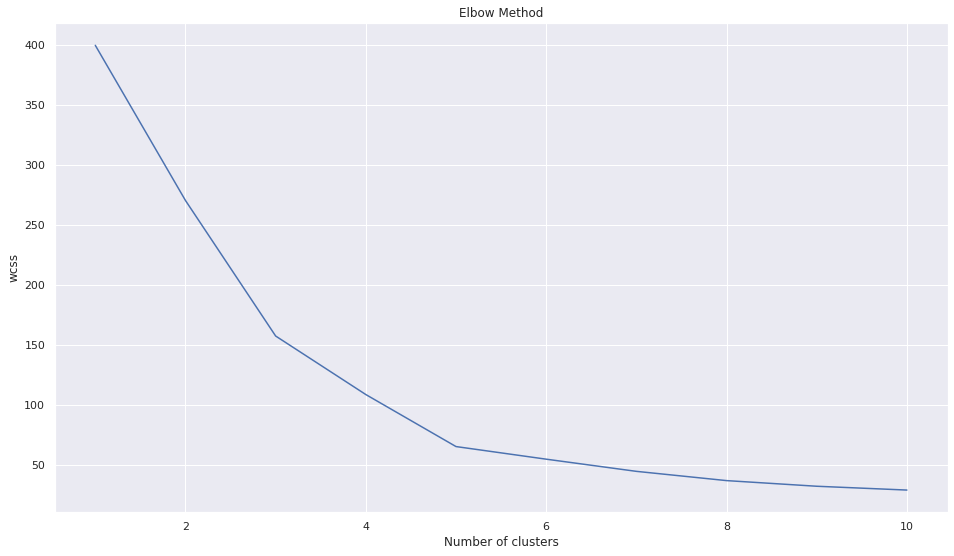

In [213]:
# Transform Data Frame to Numpy Array
spend = df_income.to_numpy()
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(spend)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [205]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(spend)
    label = kmeans.labels_
    sil_coeff = silhouette_score(spend, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.408542727789858
For n_clusters=3, The Silhouette Coefficient is 0.4939356812205861
For n_clusters=4, The Silhouette Coefficient is 0.5462978058894477
For n_clusters=5, The Silhouette Coefficient is 0.6133145654307677
For n_clusters=6, The Silhouette Coefficient is 0.6499642340230446
For n_clusters=7, The Silhouette Coefficient is 0.6349167053658734
For n_clusters=8, The Silhouette Coefficient is 0.6015249666507546
For n_clusters=9, The Silhouette Coefficient is 0.6164444343976363
For n_clusters=10, The Silhouette Coefficient is 0.604392545201422


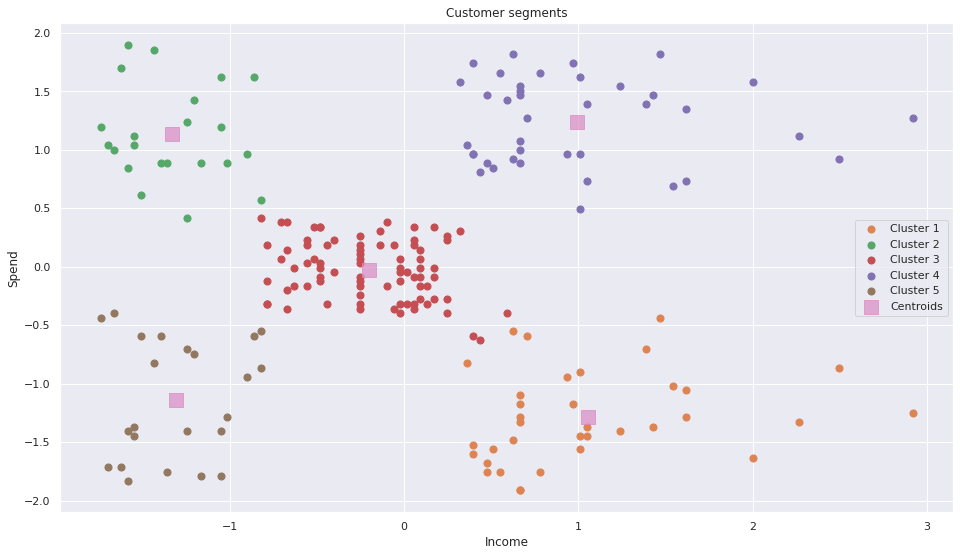

In [214]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(spend)

# Visualising Clusters for k=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_income)
plt.scatter(spend[cluster == 0, 0], spend[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(spend[cluster == 1, 0], spend[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(spend[cluster == 2, 0], spend[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(spend[cluster == 3, 0], spend[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(spend[cluster == 4, 0], spend[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()
plt.show()

## Spending Score berdasarkan Umur

In [215]:
# Select Features
df_age=df_spend.drop(['Gender','CustomerID','Annual Income (k$)'], axis=1)
# Prints the Dataset Information
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [216]:
# Prints Descriptive Statistics
df_age.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [217]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler1 = StandardScaler() 

# Fit Standardization
column_names1 = df_age.columns.tolist()
df_age[column_names1] = scaler1.fit_transform(df_age[column_names1])
df_age.sort_index(inplace=True)
df_age

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


Text(0.5, 1.0, 'Customer Segments')

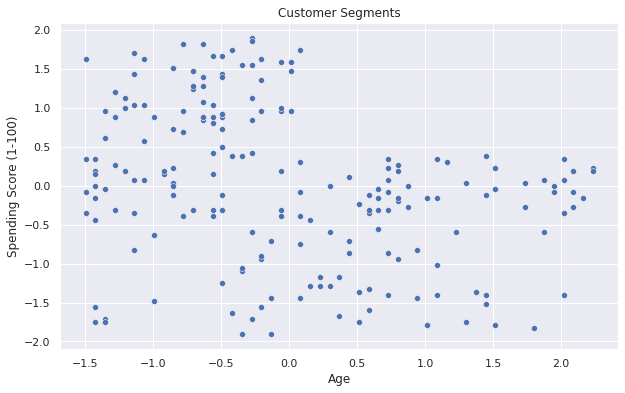

In [218]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_age)
plt.title('Customer Segments')

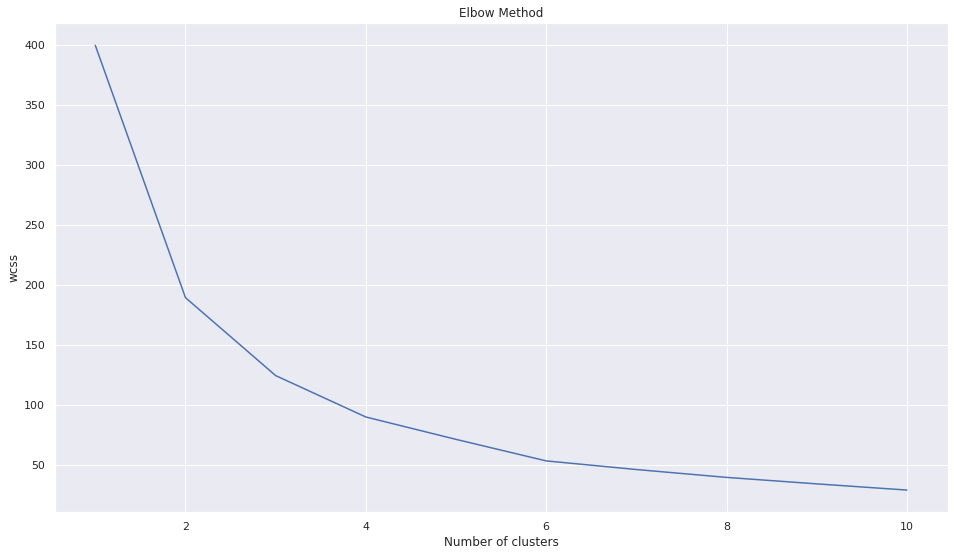

In [219]:
# Transform Data Frame to Numpy Array
spend1= df_age.to_numpy()
spend1

# Elbow Method
from sklearn.cluster import KMeans
wcss1 = []
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans1.fit(spend1)
    wcss1.append(kmeans1.inertia_)
  
# Visualize 
plt.plot(range(1, 11),wcss1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [220]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_clusters in range(2, 11):
    kmeans1 = KMeans(n_clusters=n_cluster).fit(spend1)
    label1 = kmeans1.labels_
    sil_coeff1 = silhouette_score(spend1, label1, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff1))

For n_clusters=10, The Silhouette Coefficient is 0.4414721977951536
For n_clusters=10, The Silhouette Coefficient is 0.4306998652425447
For n_clusters=10, The Silhouette Coefficient is 0.4334931470719351
For n_clusters=10, The Silhouette Coefficient is 0.44054402027345985
For n_clusters=10, The Silhouette Coefficient is 0.43926331503694477
For n_clusters=10, The Silhouette Coefficient is 0.4342095874200376
For n_clusters=10, The Silhouette Coefficient is 0.4408471716473981
For n_clusters=10, The Silhouette Coefficient is 0.4425848812061723
For n_clusters=10, The Silhouette Coefficient is 0.44055467418768446


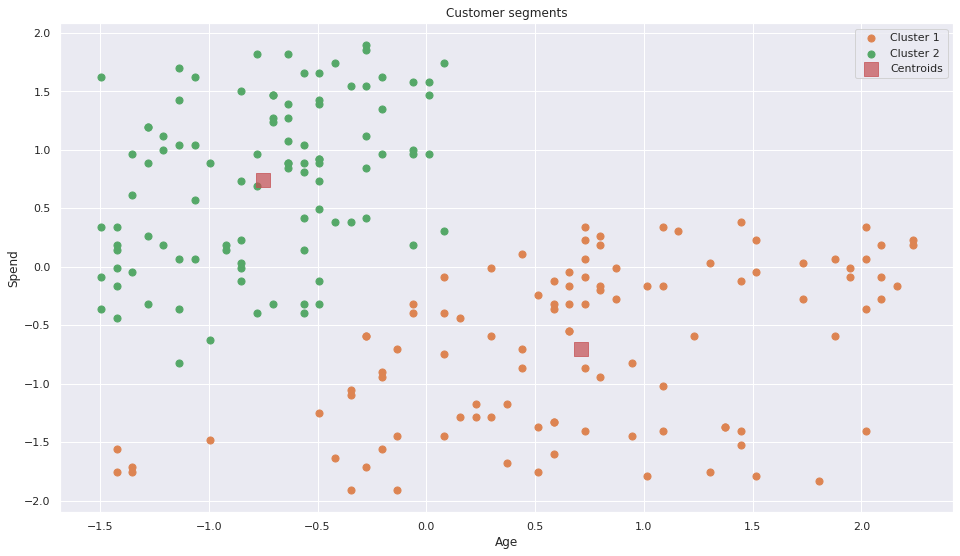

In [221]:
# Apply the K-Means Model to the Data
kmeans1 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster1 = kmeans1.fit_predict(spend1)

# Visualising Clusters for k=2
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_age)
plt.scatter(spend1[cluster1 == 0, 0], spend1[cluster1 == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(spend1[cluster1 == 1, 0], spend1[cluster1 == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spend')
plt.legend()
plt.show()

# Agglomerative (Hierarchical Clustering)

## Spending Score berdasarkan Annual Income

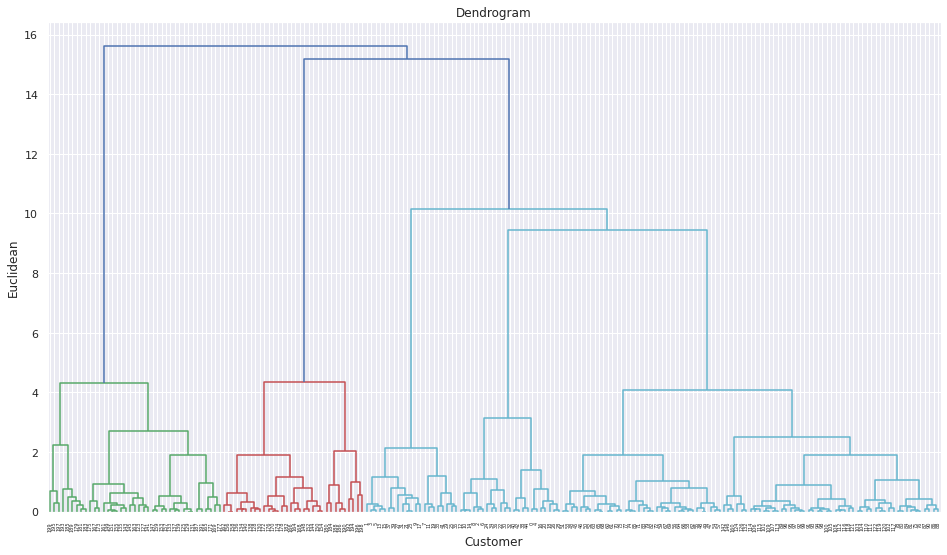

In [222]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(spend, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

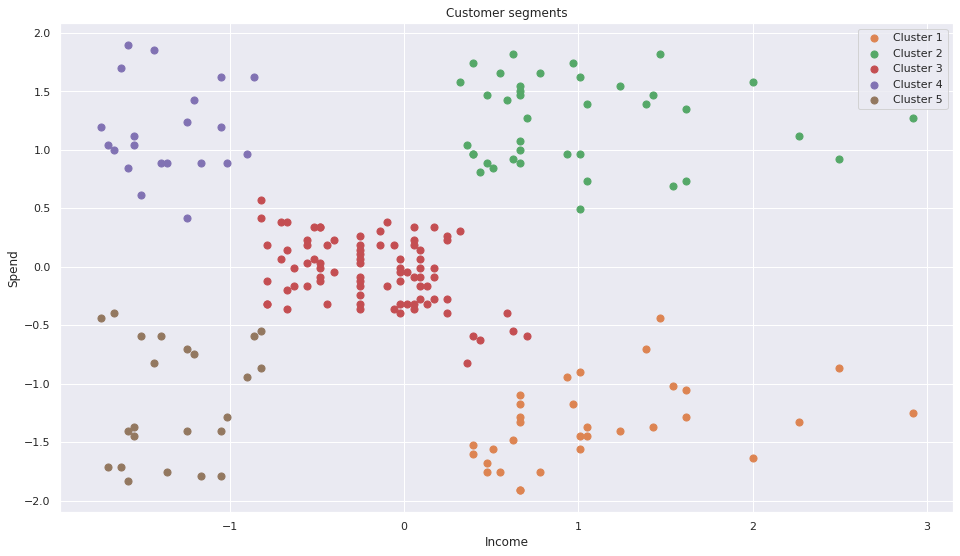

In [223]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hclustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hclustering.fit_predict(spend)
# Visualising Clusters for k=5
plt.figure(figsize=(16, 9))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_income)
plt.scatter(spend[hcluster == 0, 0], spend[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(spend[hcluster == 1, 0], spend[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(spend[hcluster == 2, 0], spend[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(spend[hcluster == 3, 0], spend[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(spend[hcluster == 4, 0], spend[hcluster == 4, 1], s = 50, label = 'Cluster 5')
plt.title('Customer segments')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()
plt.show()

## Spending Score berdasarkan Umur

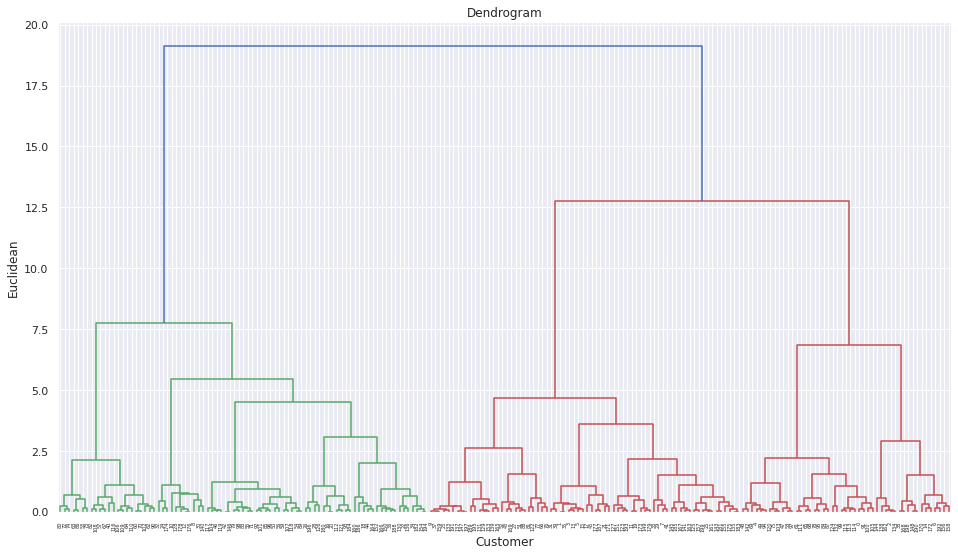

In [224]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dendogram1 = sch.dendrogram(sch.linkage(spend1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

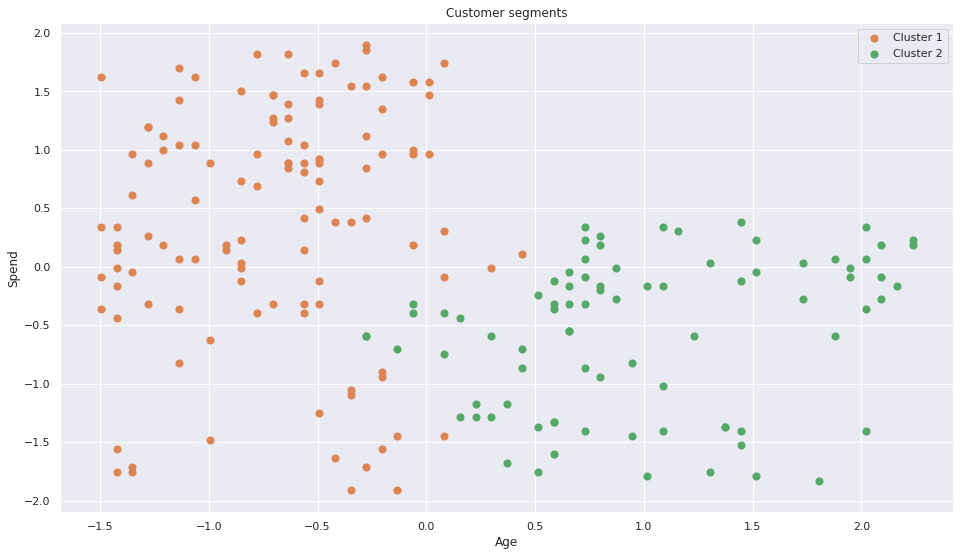

In [225]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hclustering1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hcluster1 = hclustering1.fit_predict(spend1)
# Visualising Clusters for k=2
plt.figure(figsize=(16, 9))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_age)
plt.scatter(spend1[hcluster1 == 0, 0], spend1[hcluster1 == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(spend1[hcluster1 == 1, 0], spend1[hcluster1 == 1, 1], s = 50, label = 'Cluster 2')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spend')
plt.legend()
plt.show()

# Menambahkan Hasil Klusterisasi pada Dataset

In [226]:
df_spend.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [228]:
# Add Cluster Information to the Raw Data
df_spend['Income Cluster'] = cluster
df_spend['Age Cluster'] = cluster1
df_spend.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Age Cluster
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,4,1


In [229]:
# Save= Result
df_spend.to_csv('mall_customers_new.csv', index=False)

In [230]:
pd.read_csv('mall_customers_new.csv')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Age Cluster
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,1
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,3,1
198,199,Male,32,137,18,0,0
